# Lab 1: Text Corpora and Language Modelling

Welcome to the first lab assignment of INFOMNLP 2024.

This lab is meant to help you get familiar with some language data, and use this data to estimate simple models called N-gram language models.

First, you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code. The Penn Treebank may be the most widely used corpus in NLP.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this for some tasks.

The dataset URLs are in the notebook and certain cells are responsible to download them.

# Rules
* The assignment should submitted to **Blackboard** as `.ipynb`. Only **one submission per group**.

* The **filename** should be the group number, e.g., `01.ipynb` or `31.ipynb`.

* The questions marked **Extra** or **Optional** are an additional challenge for those interested in going the extra mile. There are no points for them.

**Rules for implementation**

* You should **write your code and answers in this iPython Notebook**. (See http://ipython.org/notebook.html for reference material.) If you have problems, please contact your teaching assistant.

* Use only **one cell for code** and **one cell for markdown** answers!    

    * Put all code in the cell with the `## YOUR CODE HERE ##` comment.
    * Provide brief comments on what the code does at crucial points.
    * For theoretical questions, put your solution in the `█████ YOUR ANSWER HERE █████` cell and keep the header.

* Don't change or delete any initially provided cells, either text or code, unless explicitly instructed to do so.
* Don't delete the comment lines `#TEST...` or edit their code cells.
* Don't change the names of provided functions and variables or arguments of the functions.
* Leave the output of your code in the output cells.
* **Don't output unnecessary info** (e.g., printing variables for debugging purposes) or **add extra code cells** (e.g., for mounting your google drive). This clutters the notebook and slows down the grading.
* Test your code and **make sure we can run your notebook** in the colab environment.
* Don't forget to fill in the contribution information.

<font color="red">You following these rules helps us to grade the submissions relatively efficiently. If these rules are violated, a submission will be subject to penalty points.</font>  

# <font color="red">Contributions</font>



All exercises were completed with the contribution of all the members by pair coding and discussion of results.

Group Members:

- Andreas Alexandrou

- Nikolas Stavrou

- Sotiris Zenios

# General instructions

Before diving into the exercises, keep in mind that the variables defined previously can be reused in the subsequent cells. So there is no need to redefine the same variable in multiple sections, e.g., it is sufficient to read the file in a variable once and later reuse the value of the variable, instead of re-reading the file.   

If your code is too long and using several code cells instead of a single code cell. Rethink how to organize data in variables that you can easily access required info. Reading about [list comprehension](https://realpython.com/list-comprehension-python/#leverage-list-comprehensions) can be useful.

Your code will often be evaluated based on its behaviour. So, during the grading some code cells are executed. If code runtime is too long than expected, this will hinder grading.

<font color="red">**The cases similar to the above-mentioned ones, will be subject to penalty points.**</font>

<font color="red">**Pay attention to test units**</font> that are either provided as assert cases or as comments. Test units help you by giving you a hint about a correct answer. Note that **passing test units doesn't guarantee the full points** for an execise because test units are incomplete and the code might fail on other test units.

# Set up

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

In [ ]:
! rm -rf data # remove if it was downloaded
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/PTB/sec02-21.gold.tagged # download the file
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/PTB/sec00.gold.tagged
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/TED/ted-train.txt
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/TED/ted-test.txt

2024-05-07 14:17:18 URL:https://naturallogic.pro/_files_/download/mNLP/PTB/sec02-21.gold.tagged [8158400/8158400] -> "data/sec02-21.gold.tagged" [1]
2024-05-07 14:17:20 URL:https://naturallogic.pro/_files_/download/mNLP/PTB/sec00.gold.tagged [399917/399917] -> "data/sec00.gold.tagged" [1]
2024-05-07 14:17:24 URL:https://naturallogic.pro/_files_/download/mNLP/TED/ted-train.txt [24743290/24743290] -> "data/ted-train.txt" [1]
2024-05-07 14:17:26 URL:https://naturallogic.pro/_files_/download/mNLP/TED/ted-test.txt [25383/25383] -> "data/ted-test.txt" [1]


# Golab variables

In [ ]:
PTB_FILES = {'train': 'data/sec02-21.gold.tagged', 'dev': 'data/sec00.gold.tagged'}
TED_FILES = {'train': 'data/ted-train.txt', 'test': 'data/ted-test.txt'}

# 1. Penn treebank

## Ex 1.1 [25pt]

You are provided with a corpus containing tokens with their Part-of-Speech tags (POS-tags for short). The format is
**token|POS** (one sentence per line) and the file name is **sec02-21.gold.tagged**. This data is extracted from Sections 02-21 from the Penn Treebank: these sections are most commonly used for training statistical models like POS taggers and parsers.

Note the **distinction between token & word**. "Token" is a technical term and represents an occurrence of a word. Here, "word" covers both lexical words and other symbols (e.g., punctuations or numbers). Often "word" is called "token type". So, one can say that a token type can have different occurrences and each occurrence is a token.

**[Hint]** **Figure 8.2** in chapter 8 of Jurafsky and Martin (see [here](https://web.stanford.edu/~jurafsky/slp3/8.pdf#page=4)) holds a summary of POS-tags used in the Penn Treebank tagset together with their meaning and some examples.

**[Hint]** The Python library [collections](https://docs.python.org/3.7/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

### (a) Corpus & vocab [5pt]

**Print** the corpus size (i.e. the number of **tokens**).  
**Print** the size of the **vocabulary** of the corpus. Estimate the vocabulary size both by **lowercasing** all the tokens as well as by leaving the tokens in their **original orthography**.  

What is the **advantage** of lowercasing all the tokens in your corpus?  
What is a notable **downside**?  
**Give examples** of the advantage and the downside.

In [ ]:
## YOUR CODE HERE ##
# Use PTB_FILES golab var

# 1. Print the corpus size.
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        return lines

def count_tokens(lines):
    token_count = 0
    for line in lines:
        tokens = line.strip().split()
        token_count += len(tokens)
    return token_count

# Read and count tokens in the training corpus
train_lines = read_file(PTB_FILES['train'])

train_tokens_count = count_tokens(train_lines)
print("Number of tokens in training data:", train_tokens_count)


# 2. Print the size of the vocabulary of the corpus. Estimate the vocabulary size both by lowercasing all the tokens as well as by leaving the tokens in their original orthography.
def get_vocabulary(lines, lowercase=False):
    vocabulary = set()
    for line in lines:
        tokens = line.strip().split()
        for token_pos in tokens:
            # token from the token|POS pair
            token = token_pos.split('|')[0]
            if lowercase:
                token = token.lower()
            vocabulary.add(token)
    return vocabulary

# print vocabulary size
vocabulary_original = get_vocabulary(train_lines)
print("Vocabulary size (original case):", len(vocabulary_original))

# print vocabulary size with lower case
vocabulary_lower = get_vocabulary(train_lines, lowercase=True)
print("Vocabulary size (lowercase):", len(vocabulary_lower))

# TEST: original orthography vocab size = ...10 (i.e., the last two digits of the vocab size are "10")

Number of tokens in training data: 929552
Vocabulary size (original case): 44210
Vocabulary size (lowercase): 39384


█████ YOUR ANSWER HERE █████

###What is the advantage of lowercasing all the tokens in your corpus?
First of all lowercasing tokens in a corpus helps reduce the vocabulary size, which makes the model simpler, improves its generalization across various cases, and makes training faster.

###What is a notable downside?

One downside of lowercasing is the loss of potentially valuable information. For example, capitalization can signify proper nouns or express emphasis, which is relevant in applications that have to do with sentiment analysis or Named-Entity Recognition etc.

###Give examples of the advantage and the downside.

Advantage:

In sentiment analysis, considering "Happy" and "happy" as the same word allows the model to learn from all instances of the term, regardless of capitalization, which results in improving the model's ability to predict sentiments more accurately from texts with varied capitalizations.

Downside:

In Named Entity Recognition, lowercasing "Apple" (the company) to "apple" (the fruit) could lead to misclassification, as the model may not understand the difference between a brand and a common noun based on capitalization cues.
In sentiment analysis, lowercasing could reduce the model's ability to detect emphasis in text. For example, "GREAT!" could express more intense satisfaction than "Great!", but this distinction is lost when both are converted to "great!".

------
**For the rest of this exercise <font color="red">you should use the original orthography</font> of the data when answering the questions.**

------

### [Extra]

Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**? For a better picture you might need to make the plot horizontally wide or consider an initial cutoff of ranked words.

In [ ]:
## YOUR CODE HERE ##

█████ YOUR ANSWER HERE █████

### (b) Tags & tokens [5pt]

**Print** a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, additionally **print** the **3 most common token types** (i.e., words) that belong to that tag. Print raw counts for each printed tag and token type.

In [ ]:
## YOUR CODE HERE ##
# Use the following printing format and test your numbers for the DT pos tag:
# DT (82147):	the(40831); a(19151); The(6753)
from collections import defaultdict, Counter

def get_pos_and_tokens(lines):
    pos_tags = defaultdict(Counter)
    for line in lines:
        tokens = line.strip().split()
        for token_pos in tokens:
            token, pos = token_pos.split('|')
            pos_tags[pos][token] += 1
    return pos_tags

# Get top N POS tags by total count
def print_top_pos_tags(pos_tags, top_n=10, top_tokens=3):
    top_tags = sorted(pos_tags.items(), key=lambda x: sum(x[1].values()), reverse=True)[:top_n]
    for pos, tokens in top_tags:
        total_count = sum(tokens.values())
        most_common_tokens = tokens.most_common(top_tokens)

        tokens_str = "; ".join(f"{token}({count})" for token, count in most_common_tokens)
        print(f"{pos} ({total_count}): {tokens_str}")

pos_tags = get_pos_and_tokens(train_lines)
print_top_pos_tags(pos_tags)


NN (132134): %(4866); company(2457); year(2220)
IN (99413): of(22778); in(14852); for(7907)
NNP (90711): Mr.(4147); U.S.(1577); Corp.(1186)
DT (82147): the(40831); a(19151); The(6753)
JJ (59643): new(1396); other(1298); last(990)
NNS (59332): years(1164); shares(1128); sales(939)
, (48314): ,(48310); an(1); 2(1)
. (39252): .(38798); ?(392); !(62)
CD (36148): million(4355); billion(1780); one(1203)
RB (30232): n't(3211); also(1420); not(1287)


### (c) Ambiguity [7pt]

A single token type (i.e. word) may occur with several POS tags. For example, *record* can be both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This makes POS tags extremely useful for **disambiguation**.

**Print** the percentage(!) of the **ambiguous** words in the vocabulary(!) (i.e. token types that have more than one POS tag?).  

Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occurring words in the English language.  
**Print** the percentage of the dataset that is ambiguous (i.e., counting tokens of ambiguous token types/words wrt data size).  
(Don't round percentages when printing)

**Print** the **10 most frequently shared POS tag pairs** (i.e. POS tag pairs that share most words).  
**Print** the **4 most ambiguous** words (i.e. based on the number of POS tags it can get)

In [ ]:
## YOUR CODE HERE ##
# TEST: There are 1060 token types whose tokens get both ('VBD', 'VBN') tags
# TEST: in other tokens, a set of tokens with VBD and a set of tokens with VBN share 1060 elements

# print in the following way:
# Print ambiguous tokens and tag pairs as, where tags are ordered alphabetically:
# Top 10 confused tag pairs:
#	('VBD', 'VBN') share 1060 tokens
#   ...
#
# Top 4 ambiguous tokens:
# 	token: [POS_1, ..., POS_n]
#   ...

def analyze_data(lines):
    token_pos = defaultdict(set)
    total_tokens = 0

    for line in lines:
        tokens = line.strip().split()
        total_tokens += len(tokens)
        for token_pos_pair in tokens:
            token, pos = token_pos_pair.split('|')
            token_pos[token].add(pos)

    return token_pos, total_tokens

def calculate_ambiguities(token_pos, total_tokens):
    ambiguous_tokens = {token: pos_tags for token, pos_tags in token_pos.items() if len(pos_tags) > 1}
    ambiguous_vocab_percentage = len(ambiguous_tokens) / len(token_pos) * 100
    ambiguous_token_counts = sum(sum(1 for token in token_pos if pos in token_pos[token]) for pos in ambiguous_tokens)
    ambiguous_data_percentage = ambiguous_token_counts / total_tokens * 100

    return ambiguous_tokens, ambiguous_vocab_percentage, ambiguous_data_percentage

def find_common_tag_pairs(ambiguous_tokens):
    tag_pairs = Counter()
    for pos_tags in ambiguous_tokens.values():
        sorted_tags = tuple(sorted(pos_tags))
        if len(sorted_tags) > 1:
            for i in range(len(sorted_tags)):
                for j in range(i + 1, len(sorted_tags)):
                    tag_pairs[(sorted_tags[i], sorted_tags[j])] += 1
    return tag_pairs

def print_results(ambiguous_tokens, ambiguous_vocab_percentage, ambiguous_data_percentage, tag_pairs):
    print(f"Ambiguous vocabulary percentage: {ambiguous_vocab_percentage}%")
    print(f"Ambiguous data percentage: {ambiguous_data_percentage}%")

    print("Top 10 confused tag pairs:")
    for tags, count in tag_pairs.most_common(10):
        print(f"\t{tags} share {count} tokens")

    print("\nTop 4 ambiguous tokens:")
    most_ambiguous_tokens = sorted(ambiguous_tokens.items(), key=lambda x: len(x[1]), reverse=True)[:4]
    for token, pos_tags in most_ambiguous_tokens:
        print(f"\ttoken: {token}, tags: {sorted(pos_tags)}")

token_pos, total_tokens = analyze_data(train_lines)
ambiguous_tokens, ambiguous_vocab_percentage, ambiguous_data_percentage = calculate_ambiguities(token_pos, total_tokens)
tag_pairs = find_common_tag_pairs(ambiguous_tokens)


print_results(ambiguous_tokens, ambiguous_vocab_percentage, ambiguous_data_percentage, tag_pairs)


Ambiguous vocabulary percentage: 13.469803211942999%
Ambiguous data percentage: 0.5101382171196447%
Top 10 confused tag pairs:
	('VBD', 'VBN') share 1060 tokens
	('JJ', 'NN') share 962 tokens
	('NN', 'VB') share 775 tokens
	('VB', 'VBP') share 752 tokens
	('NN', 'NNP') share 627 tokens
	('JJ', 'VBN') share 456 tokens
	('NN', 'VBP') share 403 tokens
	('NN', 'VBG') share 378 tokens
	('NNS', 'VBZ') share 364 tokens
	('JJ', 'NNP') share 297 tokens

Top 4 ambiguous tokens:
	token: set, tags: ['JJ', 'NN', 'VB', 'VBD', 'VBN', 'VBP', 'VBZ']
	token: many, tags: ['DT', 'JJ', 'NN', 'NP', 'PDT', 'RB', 'VB']
	token: open, tags: ['JJ', 'NN', 'RB', 'RP', 'VB', 'VBP', 'VBZ']
	token: down, tags: ['IN', 'JJ', 'NN', 'RB', 'RBR', 'RP', 'VBP']


### (d) Explain [8pt]

**Take one** of the 4 most ambiguous tokens and for **each** of its possible POS tags **give** a sentence/phrase from the **training data** that shows the use of the token with its POS tag.  
For the other **three** tokens, **discuss ** the POS tag that is least likely in the training data for the corresponding token.      
Consult [Figure 8.2](https://web.stanford.edu/~jurafsky/slp3/8.pdf#page=4) for the interpretation of the POS tags. If you would like a more detailed explanation of the POS tags, consult [this technical report](http://www.cs.cmu.edu/afs/cs/Web/People/dgovinda/pdf/semantics/tagguide.pdf). Of course, you don't need to read it entirely, just use it to search for certain POS tags in it.

█████ YOUR ANSWER HERE █████

####Take one of the 4 most ambiguous tokens and for each of its possible POS tags give a sentence/phrase from the training data that shows the use of the token with its POS tag.

Token set:

  - Tag JJ: A futures contract is an agreement to buy or sell a commodity or financial instrument at a set price on a specified date .

  - Tag NN: Just the thing for the Vivaldi-at-brunch set , the yuppie audience that has embraced New Age as its very own easy listening .

  - Tag VB: The National Transportation Safety Board ruled that pilots failed to set the plane 's wing flaps and slats properly for takeoff and failed to make mandatory preflight checks that would have detected the error .

  - Tag VBD: Mr. Ridley 's announcement set off a howl of protests from members of the opposition Labor Party , who accused the Thatcher administration of backing down on promised protection for a privatized company .

  - Tag VBN: A record date hasn't been set .

  - Tag VBP: Another finding from the study : Prosecutors set significantly different priorities .

  - Tag VBZ: Dreyfus moved to the $ 1 price after the SEC set standards -- an average 120-day maturity of high-grade paper -- that are still the rule .

####For the other three tokens, *discuss * the POS tag that is least likely in the training data for the corresponding token:

Token many:

  - Probably the tag 'VB' is the least likely in the trainig data. This is because 'many' it is not used as a verb in english.

Token open:

  - The tag 'RP' because 'open' as a particle is rare and context-dependent.

Token down:

  - The tag 'VBP' (Verb, present tense, other than third person singular) because 'down' is quite rare and context specific for it to be used as a present tense verb in english.

## Ex 1.2 [7pt]

You are also provided with another file called **sec00.gold.tagged**.
Section 00 of the Penn Treebank is typically used as development data.

### (a) Unseen % [5pt]

**Print** the percentages of the **unseen development vocabulary** and **unseen development data** (i.e., token types and tokens that occur in the development data but not in the training data). Percentages should be calculated wrt the development vocabulary/data size and they shouldn't be rounded.

In [ ]:
## YOUR CODE HERE ##
# Use PTB_FILES global var
# TEST: Difference between the percentages is in the interval 11-14%

dev_lines = read_file(PTB_FILES['dev'])

def extract_tokens(lines):
    tokens = set()
    token_frequencies = {}
    for line in lines:
        token_pos_pairs = line.strip().split()
        for pair in token_pos_pairs:
            token, _ = pair.split('|')
            tokens.add(token)
            if token in token_frequencies:
                token_frequencies[token] += 1
            else:
                token_frequencies[token] = 1
    return tokens, token_frequencies

train_tokens, train_token_frequencies = extract_tokens(train_lines)
dev_tokens, dev_token_frequencies = extract_tokens(dev_lines)

# Get the unseen tokens and token types from the dev data
unseen_tokens = dev_tokens - train_tokens
unseen_token_count = sum(dev_token_frequencies[token] for token in unseen_tokens)

#Percentages of unseen vocabulary and unseen data
unseen_vocabulary_percentage = len(unseen_tokens) / len(dev_tokens) * 100
unseen_data_percentage = unseen_token_count / sum(dev_token_frequencies.values()) * 100

print(f"Unseen vocabulary percentage: {unseen_vocabulary_percentage}%")
print(f"Unseen data percentage: {unseen_data_percentage}%")

Unseen vocabulary percentage: 16.34932724041635%
Unseen data percentage: 3.804323895909471%


### (b) Unseen tok tag [2pt]

**Print** the top **five** POS tags that the most **unseen tokens** belong to.

In [ ]:
## YOUR CODE HERE ##
# Print in the following format:
# POS_tag (the_number_of_corresponding_unseen_tokens)

def extract_token_pos(lines):
    token_pos_counts = defaultdict(int)
    for line in lines:
        token_pos_pairs = line.strip().split()
        for pair in token_pos_pairs:
            token, pos = pair.split('|')
            token_pos_counts[(token, pos)] += 1
    return token_pos_counts

# Get tokens and POS tags from train/dev data
train_token_pos_counts = extract_token_pos(read_file(PTB_FILES['train']))
dev_token_pos_counts = extract_token_pos(read_file(PTB_FILES['dev']))

# Determine unseen tokens
unseen_token_pos_counts = defaultdict(int)
for (token, pos), count in dev_token_pos_counts.items():
    if (token, pos) not in train_token_pos_counts:
        unseen_token_pos_counts[pos] += count

# top five POS tags with the most unseen tokens
top_five_pos_tags = sorted(unseen_token_pos_counts.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top five POS tags for unseen tokens:")
for pos, count in top_five_pos_tags:
    print(f"{pos} ({count})")

Top five POS tags for unseen tokens:
NNP (858)
JJ (297)
NN (250)
NNS (161)
CD (117)


# 2. Language Models



The following questions presuppose J&M's [chapter 3 on n-gram language models](https://web.stanford.edu/~jurafsky/slp3/3.pdf).

Models that assign **probabilities** to **sequences of words** are called **language
models** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method ([read more](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$

## Ex 2.1 [25pt]

In this exercise you will have to train $N$-gram language models with an optional smoothing.

#### Some help

The `collections` library has another useful data structure: the `defaultdict`. Some example uses (learn more [here](https://realpython.com/python-defaultdict/) if needed):

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

In [ ]:
from collections import defaultdict

d = defaultdict(float)
d["new key"]

0.0

Compare that to an ordinary dictionary:

In [ ]:
# d = dict()
# d["new key"]
# Throws an KeyError: 'new key'

Other datatypes as `default_factory`:

In [ ]:
d = defaultdict(int)
print(d)
print(d["new key"])
print(d)

defaultdict(<class 'int'>, {})
0
defaultdict(<class 'int'>, {'new key': 0})


In [ ]:
d = defaultdict(list)
print(d)
print(d["new key"])
print(d)

defaultdict(<class 'list'>, {})
[]
defaultdict(<class 'list'>, {'new key': []})


Note how the defaultdict is modified after getting a value of a non-existing key. If you want to avoid modifying the defaultdict when getting a value for a non-existing key, do the following:

In [ ]:
d = defaultdict(list)
print(d)
print(d.get("new key", d.default_factory()))
print(d)

defaultdict(<class 'list'>, {})
[]
defaultdict(<class 'list'>, {})


Converting an already existing `dict`:

In [ ]:
d1 = {k: "value" for k in range(1, 11)}
d = defaultdict(float, d1) # convert it to a defaultdict
print(d[5])
print(d[100])

value
0.0


This doesn't work:

In [ ]:
# d = defaultdict(10)
# Throws a TypeError: first argument must be callable or None

Use a `lambda` to make the number `10` `callable`":

In [ ]:
d = defaultdict(lambda: 10)
print(d)
print(d["new key"])
print(d)

defaultdict(<function <lambda> at 0x7baf4abd4e50>, {})
10
defaultdict(<function <lambda> at 0x7baf4abd4e50>, {'new key': 10})


In [ ]:
d = defaultdict(lambda: defaultdict(float))
print(d)
print(d["new key"])
print(d)

defaultdict(<function <lambda> at 0x7baf4abd4dc0>, {})
defaultdict(<class 'float'>, {})
defaultdict(<function <lambda> at 0x7baf4abd4dc0>, {'new key': defaultdict(<class 'float'>, {})})


Note that in some cases the behaviour of lambda functions might be counterintuitive. One of such cases is the closure: [link1](https://realpython.com/python-lambda/#closure), [link2](https://stackoverflow.com/questions/2295290/what-do-lambda-function-closures-capture).

In [ ]:
# making a shortcut for the read-only get for defaultdict that supports several keys
# i.e. defget(d, [k1, k2]) will return the value of d[k1][k2] without altering d
def defget(d, keys):
    for k in keys:
        d = d.get(k, d.default_factory() if isinstance(d, defaultdict) else None) #PATCH
    return d

# testing if it works as intended
d = defaultdict(lambda: defaultdict(int))
d[1][1] = 2
d[2][1] = 3
print(d)
print(defget(d, [1, 1]))
print(defget(d, [3]))
print(defget(d, [3, 1]))
print(d)

defaultdict(<function <lambda> at 0x78ffc24a16c0>, {1: defaultdict(<class 'int'>, {1: 2}), 2: defaultdict(<class 'int'>, {1: 3})})
2
defaultdict(<class 'int'>, {})
0
defaultdict(<function <lambda> at 0x78ffc24a16c0>, {1: defaultdict(<class 'int'>, {1: 2}), 2: defaultdict(<class 'int'>, {1: 3})})


Clever use of a `defaultdict` can be the solution to the problem of data-storing in a smoothing $N$-gram pointed out above:
    
    d = bigram_frequencies[history] = {w1: 120, w2: 340, w3: 7 ...}
    N = sum(d.values())
    # d_normalized = .... # normalize d with smoothing applied to elements already in the dictionary  
    d_smoothed = defaultdict(lambda: k/(N + kV), d_normalized) # add smoothing to 'unseen' words

The following function is given to assist you with reading the data from the file in a convenient format. Understand how the function works and figure out how to use it for training n-grams.

Note that the function uses padding symbols `<s>` and `</s>` to mark sentence boundaries. **When doing smoothing, include `</s>` in the vocabulary (and unigram models)**, otherwise after smoothing certain conditional probabilities will sum up higher than 1.  
🤔 It is a good practice to think of why this would be the case.  

In [ ]:
def read_data(fname, h=1, max_lines=np.inf):
    """
    Reads in the data from a file and returns a vocabulary as a set
    and the sentence-padded data as a list of list.

    :param fname: path to the file
    :param max_lines: the number of top lines to read (can be used for debugging)
    :param h: the length of n-gram history
    :returns: data as a list of lists and vocabulary as a set
    """
    data = []
    start = h * ["<s>"]
    end = ["</s>"]

    with open(fname, "r") as F:
        for k, line in enumerate(F):
            # an optional cut-off to read a part of the data
            if k > max_lines:
                break
            words = line.strip().split()
            # padding the sentence
            sent = start + words + end
            data.append(sent)
    return data

### train_ngram

[15pt] **Complete** the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3$.

[10pt] **Extend** the function `train_ngram` so that it accepts a parameter `k` for optional add-$k$ smoothing (upgrade the same function, don't define new).

In [ ]:
# WITH SMOOTHING

def train_ngram(data, N=2, k=0):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionally returns the unigram model

    :param data: text-data as returned by the pre-defined function read_data
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram, N=3 gives a trigram, etc.
    :param k: optional add-k smoothing parameter
    :returns: ngram and unigram models as dictionaries
    """

    # ngram = defaultdict(Counter) # ngram[history][word] = #(history,word)
    # for history of length >1, join tokens with a singel white space (see tests below)

    ## YOUR CODE HERE ##
    ## you can have auxiliary functions if needed, inside of outside this function's scope

    # the following line might be useful and its use is optional
    # unigram = defaultdict(float, Counter("SOME VAR HERE")) # default prob is 0.0

    ngram = defaultdict(lambda: defaultdict(int))
    unigram = defaultdict(int)
    vocabulary = set()

    for sentence in data:
        for word in sentence:
            vocabulary.add(word)

        for i in range(len(sentence)):
          # Skip the first N-1
            if i < N-1:
                continue

            if N == 2:
                # For bigrams
                history = sentence[i-1]
            else:
                # For trigrams and higher
                history = ' '.join(sentence[i-N+1:i])

            word = sentence[i]
            ngram[history][word] += 1
            unigram[word] += 1

    # Add vocabulary size for smoothing
    vocabulary.add('</s>')
    V = len(vocabulary)

    #smoothing using Add-a
    if k > 0:
        for history, freqs in ngram.items():
            total = sum(freqs.values())
            default_count = k / (total + k * V)
            updated_freqs = defaultdict(lambda: default_count,
                {word: (count + k) / (total + k * V) for word, count in freqs.items()})
            ngram[history] = updated_freqs
    else:
        # Counts to probabilities for ngrams without smoothing
        for history, freqs in ngram.items():
            total = sum(freqs.values())
            # ngram[history] = {word: count / total for word, count in freqs.items()}
            for word in freqs:
              freqs[word] /= total

    # Normalize the counts for unigrams considering smoothing
    total_unigrams = sum(unigram.values()) + k * V if k > 0 else sum(unigram.values())
    for word in unigram:
        unigram[word] = (unigram[word] + k) / total_unigrams if k > 0 else unigram[word] / total_unigrams

    return ngram, unigram

In [ ]:
# This shouldn't take more than 2min
Data1 = read_data('data/ted-train.txt', h=1) ## YOUR CODE HERE ##
# use the global variable for the file path
# non-smoothed bigram
Bigram, Unigram = train_ngram(Data1, N=2, k=0)
# smoothed bigram
Bigram_sm, Unigram_sm = train_ngram(Data1, N=2, k=1)

In [ ]:
# Running this might take significant amount of memory
# Runtime shouldn't take more than 3min
Data2 = read_data('data/ted-train.txt', h=2) ## YOUR CODE HERE ##
# non-smoothed trigram
Trigram, Unigram_ = train_ngram(Data2, N=3, k=0)
# smoothed trigram
Trigram_sm, Unigram_sm_ = train_ngram(Data2, N=3, k=1)

In [ ]:
#TEST 2.1
# Be aware that when getting a value of a non-existing key from defaultdict with d[key] method,
# the key gets inserted into the defaultdict. That's why tests use defget
assert defget(Bigram, ['all','people']) > 0
assert defget(Bigram, ['all','all']) == 0
assert defget(Bigram_sm, ['all','all']) == defget(Bigram_sm, ['all','asdasda'])
assert defget(Bigram_sm, ['all','asdasda']) > 0
assert defget(Trigram, ['<s> <s>','The']) > 0
assert defget(Trigram, ['<s> <s>','sun']) == 0
assert np.isclose(sum(Trigram['All the'].values()), 1) #almost 1, but not 1 because of float point rounding
assert defget(Trigram_sm, ['<s> <s>','sun']) > 0
assert defget(Unigram, ['</s>']) > 0
assert Unigram == Unigram_
assert Unigram_sm == Unigram_sm_

## Ex 2.2 [5pt]

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependencies that occur in actual sentences and the better your chances are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases, only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training set.

### Some help

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

In [ ]:
import random

P = [0.2,0.5,0.2,0.1]

def sample(P):
    u = random.random() # random number between 0 and 1
    p = 0
    for i, p_i in enumerate(P):
        p += p_i
        if p > u:
            return i # the first i s.t. p1 + ... + pi > u

print(sample(P))

print(Counter([sample(P) for i in range(1000)])) # check to see if the law of large numbers is still true

1
Counter({1: 483, 0: 209, 2: 196, 3: 112})


Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, [section 3.3](https://web.stanford.edu/~jurafsky/slp3/3.pdf#page=10))

### generate_sent

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a **natural language string(!)** (it shouldn't contain padding symbols and might not be a grammatical sentence) by **sampling** from the language model.

In [ ]:
import random

def generate_sent(lm, N):
    """
    Generates a sentence from a language model based on N-grams
    :param lm: language model (ngram model) based on N-grams
    :param N: denoting N-gram parameter
    :returns: a string of natural language tokens where tokens are separated with a space
    """
    ## YOUR CODE HERE ##
    ## you can have auxiliary functions if needed, inside of outside this function's scope

    sentence = []
    if N == 1:
        # Unigram model
        start = '<s>'
    else:
        start = '<s> ' * (N-1)
        start = start.strip()
    context = start.split()
    while True:
        if context[-1] == '</s>':
            break

        current_context = ' '.join(context[-(N-1):])
        next_word = sample_from_distribution(lm[current_context])
        sentence.append(next_word)
        context.append(next_word)

        # Stop if sentence is long enough
        if len(sentence) > 10 :
            break

    # Remove any '</s>' before joining words into a sentence
    if sentence[-1] == '</s>':
        sentence = sentence[:-1]

    return ' '.join(sentence)

# Randomly selects a word based on a distribution of probabilities
def sample_from_distribution(distribution):
    words, probs = zip(*distribution.items())
    total = sum(probs)
    r = random.random() * total
    cum_prob = 0.0
    for word, prob in zip(words, probs):
        cum_prob += prob
        if cum_prob > r:
            return word
    return words[-1]

In [ ]:
#TEST Ex2.2
# random.seed(42) #uncommnet if you want to make the output non-deterministic

print("Bigram:\n")
print("\n".join([generate_sent(Bigram, 2) for _ in range(5)]))

print("\nTrigram:\n")
print("\n".join([generate_sent(Trigram, 3) for _ in range(5)]))

Bigram:

And people I don 't break from an opinion polls Chinese
No , that team and also recalled that a bit to
Top of abstract way beyond what ? If anything ; it
Imagine your dog owner noticed , we include a sci-fi genus
Right now with people what you think of children and kindness

Trigram:

I had learned it : the theory with you The Digital
This is like moving graveyards .
" And so if we have a star , a notification
First entertainment comes evidence from psychology and see if you 're
So in order to proliferate , and I 've got to


### [Extra]
No points for this

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

In [ ]:
## YOUR CODE HERE ##

YOUR ANSWER HERE

## Ex 2.3 Smoothing effect [5pt]

Let $V$ denote our vocabulary. Recall that for any $w \in V$ `bigram[w]` defines a conditional probability $p(v|w)$ over $v$ in $V$. In the case of an **unsmoothed bigram**, $p(v|w) = 0$ for most $v\in V$, whereas in the **smoothed bigram** smoothing took care that $p(v|w) > 0$ for *all* $v$.

The function `plot_bigram_dist(word, bigram, smoothbigram, k=30)` plots $p(v|word)$ for the `k` and words $v$. One bar shows the probabilities in `bigram` and one in `smoothbigram`.

1. Use `plot_bigram_dist` to plot the bigram distributions for two words, frequent $w_1$ and infrequent $w_2$, i.e., the distributions of $p(v|w_1)$ and $p(v|w_2)$. Adjust the cut-off `n` parameter for better visualization.

2. **Compare** the effect of `k=1` smoothing on the bigram distributions of the frequent $w_1$ and infrequent $w_2$ words. Give an informative insight instead of literally describing the plots.

3. Now plot the same distributions but with $k$ being much smaller than 1 (but greater than 0!). **Explain and contrast** how the value of $k$ affects the distributions of the frequent $w_1$ and infrequent $w_2$ words. Again, give an informative insight instead of literally describing the plots.

While providing the insights, try to be concise and right to the point.


**[Hint]** Remember that add-1 smoothing turns
$$P(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}$$
into
$$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|}.$$

In [ ]:
import pandas as pd
import seaborn as sns

def plot_bigram_dist(word, bigram, smoothbigram, n=30):
    d = bigram[word]
    #print(type(d))
    ds = smoothbigram[word]

    # sort the probabilities
    d_sort = sorted(d.items(), reverse=True, key=lambda t: t[1])[0:n]
    ds_sort = sorted(ds.items(), reverse=True, key=lambda t: t[1])[0:n]

    _, probs = zip(*d_sort)
    smooth_ws, smooth_probs = zip(*ds_sort)

    # make up for the fact that in the unsmoothed case non-0 probs is generally less than n long
    probs = probs + (0,) * (n-len(probs))

    w_data = pd.DataFrame({f"{word}": smooth_ws * 2,
                           f"P(w|{word})": probs + smooth_probs,
                           "smoothing": ["unsmoothed"]*n + ["smoothed"]*n})
    print(w_data)
    fig, ax = plt.subplots(figsize=(12,5))
    plt.xticks(rotation=90)
    g = sns.barplot(ax=ax, x=f"{word}", y=f"P(w|{word})", hue="smoothing",
                    data=w_data, palette="Blues_d")

         the  P(w|the)   smoothing
0      world  0.028057  unsmoothed
1       same  0.017415  unsmoothed
2      first  0.013724  unsmoothed
3        way  0.013175  unsmoothed
4       most  0.010981  unsmoothed
5      other  0.008930  unsmoothed
6       last  0.007649  unsmoothed
7       time  0.007439  unsmoothed
8       next  0.007008  unsmoothed
9     people  0.006398  unsmoothed
10     right  0.005762  unsmoothed
11       end  0.005634  unsmoothed
12    future  0.005147  unsmoothed
13    United  0.004983  unsmoothed
14     brain  0.004906  unsmoothed
15      best  0.004875  unsmoothed
16      only  0.004276  unsmoothed
17    things  0.004158  unsmoothed
18      idea  0.004122  unsmoothed
19     whole  0.004122  unsmoothed
20         U  0.003901  unsmoothed
21  Internet  0.003742  unsmoothed
22       one  0.003425  unsmoothed
23   problem  0.003337  unsmoothed
24      very  0.003307  unsmoothed
25      fact  0.003214  unsmoothed
26    middle  0.003112  unsmoothed
27       top  0.0029

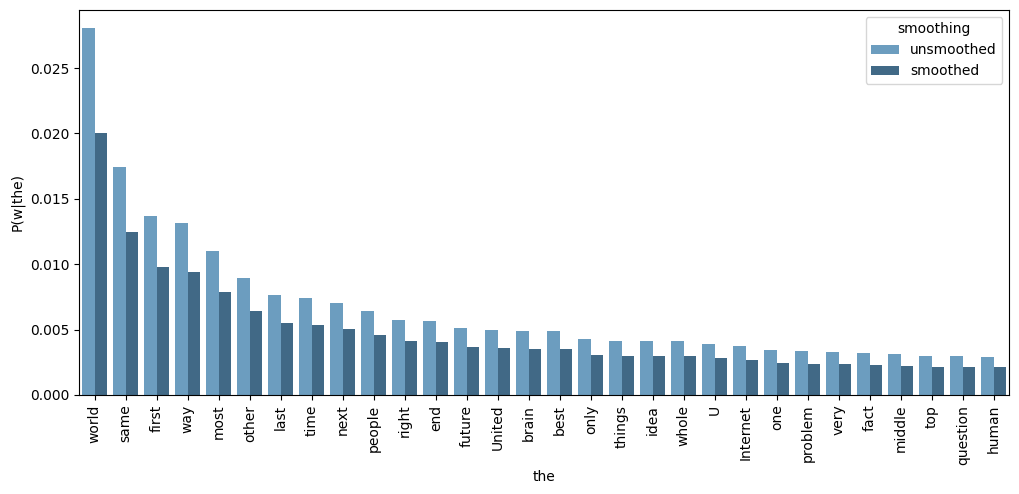

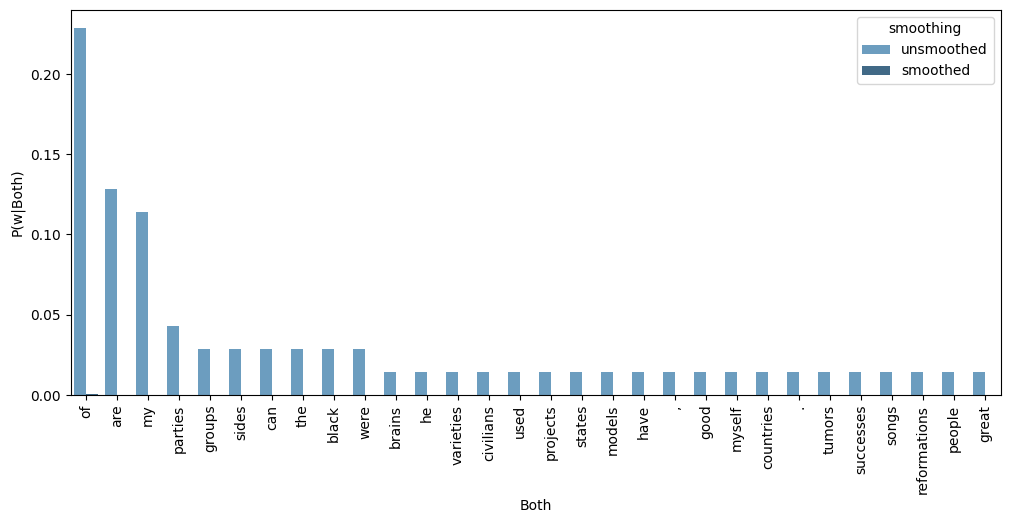

In [ ]:
# Use these variables
Freq_word, Infreq_word = "the", "Both"

## YOUR CODE HERE ##
plot_bigram_dist(Freq_word, Bigram, Bigram_sm, n=30)

plot_bigram_dist(Infreq_word, Bigram, Bigram_sm, n=30)

# Graphs are at end of output cell below

         the  P(w|the)   smoothing
0      world  0.028057  unsmoothed
1       same  0.017415  unsmoothed
2      first  0.013724  unsmoothed
3        way  0.013175  unsmoothed
4       most  0.010981  unsmoothed
5      other  0.008930  unsmoothed
6       last  0.007649  unsmoothed
7       time  0.007439  unsmoothed
8       next  0.007008  unsmoothed
9     people  0.006398  unsmoothed
10     right  0.005762  unsmoothed
11       end  0.005634  unsmoothed
12    future  0.005147  unsmoothed
13    United  0.004983  unsmoothed
14     brain  0.004906  unsmoothed
15      best  0.004875  unsmoothed
16      only  0.004276  unsmoothed
17    things  0.004158  unsmoothed
18      idea  0.004122  unsmoothed
19     whole  0.004122  unsmoothed
20         U  0.003901  unsmoothed
21  Internet  0.003742  unsmoothed
22       one  0.003425  unsmoothed
23   problem  0.003337  unsmoothed
24      very  0.003307  unsmoothed
25      fact  0.003214  unsmoothed
26    middle  0.003112  unsmoothed
27       top  0.0029

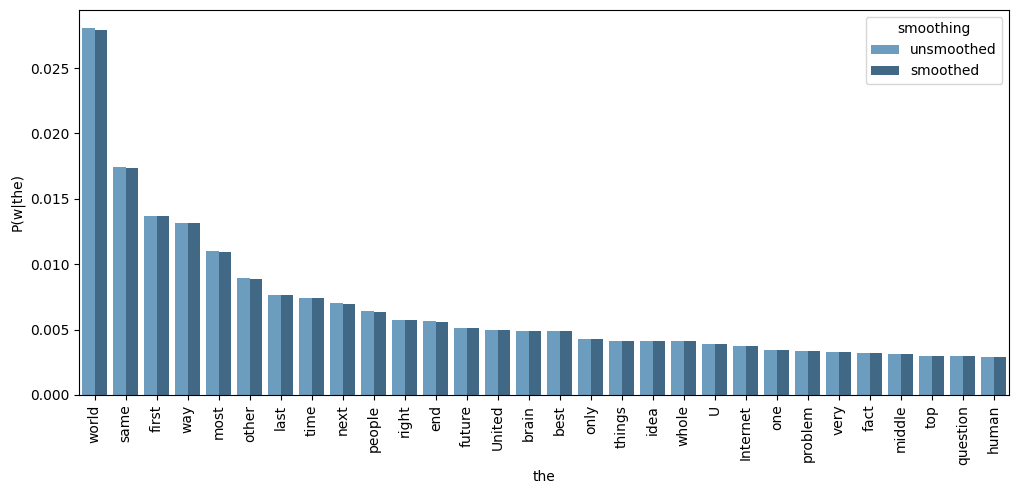

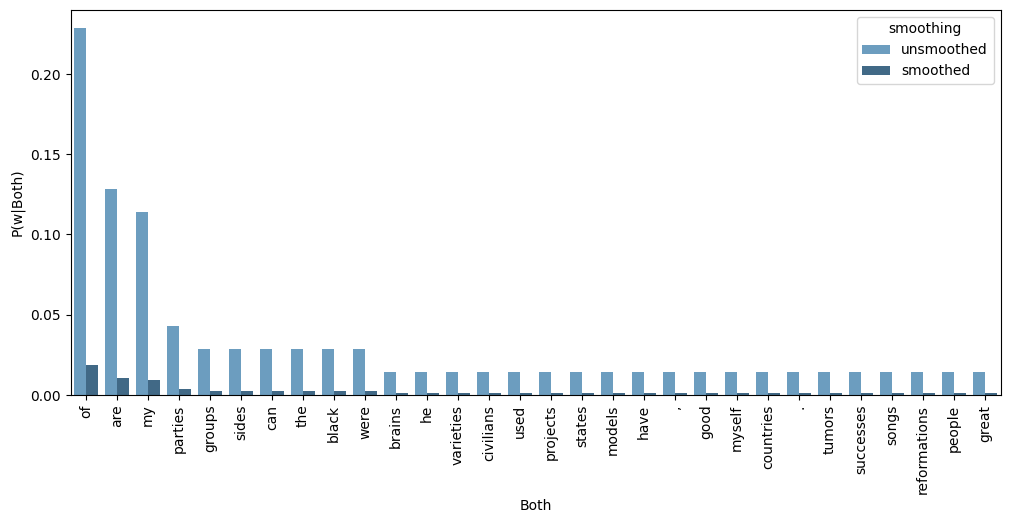

In [ ]:
# Use this K value and reuse Freq_word, Infreq_word
Small_k = 0.01

Bigram_sm_smallk, Unigram_sm_smallk = train_ngram(Data1, N=2, k=Small_k)

plot_bigram_dist(Freq_word, Bigram, Bigram_sm_smallk, n=30)

plot_bigram_dist(Infreq_word, Bigram, Bigram_sm_smallk, n=30)

# Graphs are at end of output cell below

█████ YOUR ANSWER HERE █████

# Analysis for k=1

**Frequent Word ("the"):** When applying smoothing with 𝑘=1
to the frequent word "the," the smoothed bigram probabilities show a redistribution of probability mass from the most frequent bigrams to less frequent ones. While unsmoothed probabilities tend to concentrate around the most common words following "the" (e.g., "world," "same," "first"), smoothing decreases their probabilities slightly while assigning small, but non-zero, probabilities to other bigrams that weren't previously observed. This results in a more uniform distribution.

**Infrequent Word ("Both"):** In contrast, for the infrequent word "Both," smoothing significantly reduces the conditional probabilities across all subsequent words. In the unsmoothed model, "Both of," "Both are," and "Both my" have substantial conditional probabilities due to their occurrence in the training data. However, with smoothing, these probabilities are drastically reduced, and all words receive a very low probability, leading to a uniform distribution where each word is almost equally probable. This happens because smoothing redistributes the probability mass more evenly among all possible bigrams. As a result, even the observed pairs like "Both of" and "Both are" have nearly negligible probabilities.

# Analysis for k=0.01

**Frequent Word ("the"):** With a smaller smoothing factor of k=0.01, the impact on the frequent word "the" is smaller. The unsmoothed and smoothed distributions closely resemble each other, with "world," "same," and "first" remaining prominent. The probability values for less frequent words increase marginally but remain significantly lower than the more common bigrams. Here, smoothing ensures that all words have a non-zero probability but maintains the dominance of frequent bigrams.

**Infrequent Word ("Both"):** Similarly, for the infrequent word "Both," the distribution becomes more balanced compared to the unsmoothed version but is less uniformly distributed than with
k=1. The unsmoothed bigrams like "Both of" and "Both are" maintain a higher probability than the less frequent bigrams. Smoothing here results in a more realistic distribution that reflects the patterns seen in training data but ensures that all possible words following "Both" have a non-zero and small, probability.

## Ex 2.4 Train sent. prob. [5pt]

**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_n|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_n|w_{n-(N-1)}\dots w_{n-1})\prod_{i=1}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .

In [ ]:
def sent_prob(sent, lm, N):
    """
    Calculates probability of sent based on the N-gram language mode lm
    :param sent: tokenized sentence string
    :param lm: N-gram language model
    :param N: N-gram size
    :returns: probabilitity number
    """

    ## YOUR CODE HERE ##
    if N == 1:
          # Unigram model
          prob = 1
          for word in sent:
              if word in lm:
                  prob *= lm[word]
              else:
                  prob *= 0
          return prob

    prob = 1.0
    # Prepend N-1 dummy '<s>' tokens for context if N > 1
    sent = ['<s>'] * (N - 1) + sent

    for i in range(N - 1, len(sent)):
      history = ' '.join(sent[i - (N - 1):i])
      word = sent[i]
      if history in lm and word in lm[history]:
          prob *= lm[history][word]
      else:
          # If the history-word pair does not exist, this word sequence has never been seen
          prob *= 0
          break
    return prob

In [ ]:
# Print all the abovemnetioned probabilities.
# The cell output should make it clear what number stands for which probability.
# Reuse the variables Unigram, Unigram_sm, Bigram, Bigram_sm, Trigram, and Trigram_sm.

Sents_from_train = (
    "Every day was about creating something new .",
    "In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .",
)

## YOUR CODE HERE ##

# Prints the probabilities of given sentences under various N-gram models.
def print_sentence_probabilities(sentences, models, N_values):

    for sent in sentences:
        print(f"Sentence: '{sent}'")
        tokenized_sent = sent.lower().split()

        for model_name, model in models.items():
            N = N_values[model_name]
            prob = sent_prob(tokenized_sent, model, N)
            print(f"Probability under {model_name} (N={N}): {prob}")
        print("\n")


models = {
    "Unigram": Unigram,
    "Unigram_sm": Unigram_sm,
    "Bigram": Bigram,
    "Bigram_sm": Bigram_sm,
    "Trigram": Trigram,
    "Trigram_sm": Trigram_sm
}

N_values = {
    "Unigram": 1,
    "Unigram_sm": 1,
    "Bigram": 2,
    "Bigram_sm": 2,
    "Trigram": 3,
    "Trigram_sm": 3
}



print_sentence_probabilities(Sents_from_train, models, N_values)

Sentence: 'Every day was about creating something new .'
Probability under Unigram (N=1): 5.0258924184606415e-23
Probability under Unigram_sm (N=1): 4.4906422087507745e-23
Probability under Bigram (N=2): 1.656305453074843e-19
Probability under Bigram_sm (N=2): 1.027467594329709e-27
Probability under Trigram (N=3): 2.486162192991662e-14
Probability under Trigram_sm (N=3): 3.233757056305702e-36


Sentence: 'In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .'
Probability under Unigram (N=1): 8.975245276056755e-98
Probability under Unigram_sm (N=1): 1.346498183109802e-97
Probability under Bigram (N=2): 2.0262160074927233e-74
Probability under Bigram_sm (N=2): 1.7313771164744456e-117
Probability under Trigram (N=3): 7.3310218595199885e-34
Probability under Trigram_sm (N=3): 2.1193392329963878e-137




**Repeat** this with the **smoothed (add-1)** versions of the N-grams (in the same above code cell).   
**What** is the effect of smoothing on the probabilities and **how** the effect compare across the different $N$-grams models? Provide explanations for the effect and the comparison.

█████ YOUR ANSWER HERE █████

The below observations were made from both sentences:

**Unigram Model (N=1)**

Smoothing decreases the probability slightly but remains within the same magnitude.

**Bigram Model (N=2)**

Smoothing drastically decreases the probability in the smoothed model, showing that many bigrams in the sentence were either unseen or rare in the training data.

**Trigram Model (N=3)**

The effect of smoothing is even more evident in the trigram model. This drastic reduction in probability reflects the high sensitivity of trigrams to rare word sequences.

We can clearly conclude that as the N-gram order increases, each word depends more heavily on its context. The more specific the N-gram model, the fewer combinations appear in the training data, which results in a higher likelihood of encountering unseen N-grams. When comparing the 2 sentences, we observe that the longer one has a significantly smaller likelihood, as more combinations are present which decrease the likelihood of the said combinations appearing.

In addition , smoothing redistributes the probability mass from observed N-grams to all possible combinations,which significantly reduces the probabilities of observed sequences.
This means that smoothing, which prevents zero probabilities, can lead to overly conservative probabilities and near zero probabilities, especially in higher-order models. This is also attributed to the fact that we used a smoothing value of k=1, as observed from the previous section.Smoothing has a significant effect on reducing the probabilities of sentences, particularly for higher-order N-gram models where unseen sequences are more frequent.

## Ex 2.5 Test sent. prob. [3pt]

The above sentences were taken from the training set, hence they will all have a probability greater than 0. The big challenge for our language model are of course with the sentences that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following sentences are taken from the **test set** available in the file **ted-test.txt**.  
**Print** the probabilities of the sentences based on the smoothed and unsmoothed language models.

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .

In [ ]:
# Print all the abovemnetioned probabilities.
# The cell output should make it clear what number stands for which probability.
# Reuse the variables Unigram, Unigram_sm, Bigram, Bigram_sm, Trigram, and Trigram_sm.

Sents_from_test = (
    "Because these robots are really safe .",
    "We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality ."
)
### YOUR CODE HERE ###
print_sentence_probabilities(Sents_from_test, models, N_values)

Sentence: 'Because these robots are really safe .'
Probability under Unigram (N=1): 1.1595633440785878e-20
Probability under Unigram_sm (N=1): 1.0537372900837916e-20
Probability under Bigram (N=2): 3.4472016187668627e-17
Probability under Bigram_sm (N=2): 5.635841142921891e-25
Probability under Trigram (N=3): 0.0
Probability under Trigram_sm (N=3): 0.0


Sentence: 'We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .'
Probability under Unigram (N=1): 4.497972915565936e-116
Probability under Unigram_sm (N=1): 4.3955197943293385e-116
Probability under Bigram (N=2): 0.0
Probability under Bigram_sm (N=2): 0.0
Probability under Trigram (N=3): 0.0
Probability under Trigram_sm (N=3): 0.0




**Contrast** the smoothed and unsmoothed probabilities and **explain** the drastic changes (if any) in terms of unseen tokens and sequences.

█████ YOUR ANSWER HERE █████

Unigram and Trigram Models

In the Unigram model, both the unsmoothed and smoothed probabilities remain similar, with the differences being negligible. For example, in the sentence "Because these robots are really safe," the unsmoothed probability is
1.16×10 ^−20 while the smoothed probability is 1.05×10 ^−20
 . This shows minimal impact of smoothing in a unigram model, where each word is treated independently.

Similarly, in the Trigram model, both the unsmoothed and smoothed probabilities are zero for both sentences, reflecting the high rarity of trigrams in the training data. Even with smoothing, the model assigns a probability of zero due to the presence of unseen trigrams.

Bigram Model

The Bigram model, indicates different results. In the sentence "Because these robots are really safe," smoothing leads to a significant drop in probability from3.45×10 ^−17 (unsmoothed) to 5.64×10 ^−25(smoothed). This drastic reduction indicates that many bigrams in the sentence, like "these robots" and "robots are," are rare in the training data.It assigns small probabilities to these unseen bigrams, diluting the probability mass across all combinations.In the sentence "We have sheer nothingness on one side, and we have this vision of a reality that encompasses every conceivable world at the other extreme: the fullest possible reality, nothingness, the simplest possible reality," both the unsmoothed and smoothed bigram models assign a probability of zero to the sentence, indicating that at least one bigram in this sequence is unseen in the training data, which assigns a value of 0 to the total probability. Despite smoothing, the probabilities remain zero, which shows us the limitations of smoothing in handling unseen sequences.

In unsmoothed models, the presence of unseen bigrams or trigrams immediately results in a probability of zero for the entire sentence due to the model's inability to handle unseen sequences. Smoothing attempts to fix this by assigning small non-zero probabilities to unseen sequences but in higher-order models  the specificity of sequences means many combinations are not observed, even with smoothing.

Smoothing also dilutes the probability mass for observed sequences, particularly in bigram. This leads to significantly reduced probabilities for both seen and unseen sequences. For infrequent N-grams, smoothing disproportionately reduces the overall probability due to the redistribution of mass.

In higher-order models, the presence of rare combinations makes it challenging for smoothing to provide meaningful probabilities for unseen sequences. In the trigram models of both sentences, unseen sequences lead to zero probabilities, even with smoothing

### [Extra]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models?

In [ ]:
### ANSWER HERE ###

## Ex 2.6 Perplexity [5pt]

**Perplexity** is very frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.

Note: Calculation of perplexity has resemblance with the **geometric mean** $(x_1\cdots x_n)^{-\frac{1}{n}}$ of the numbers $x_1,\dots,x_n$. It is like the (regular) arithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the sentences in the training data (from exercise 2.1) based on the smoothed bigram language model. It is recommended to use `sent_prob` from Ex2.4.

What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?  
**Provide** a strong evidence (e.g., a concrete example or a plot) and **explain** the difference.

In [ ]:
# Feel free to reuse functions and variables form the previous exercises

### YOUR CODE HERE ###
import math

def compute_perplexity(sentence, lm, N):
    total_words = 0

    prob = sent_prob(sentence, lm, N)

    if prob > 0:
        perplexity = math.pow(prob, -1/len(sentence))
    else:
        # if probability is = 0
        perplexity = float('inf')

    return perplexity

# Example usage
# Sents_from_test = (
#     "Because these robots are really safe .",
#     "We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality ."
# )
sentence = [
    "Every day was about creating something new ."
    ]
sentence1 = ["In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy ."]

sentence2 = [
    "Because these robots are really safe ."
    ]

lm = Bigram_sm
N = 2
print(f"Perplexity of the sentence: {compute_perplexity(sentence[0].split(), lm, N)}")
print(f"Probability of the sentence: {sent_prob(sentence[0].split(), lm, N)}\n")
print(f"Perplexity of the sentence1: {compute_perplexity(sentence1[0].split(), lm, N)}")
print(f"Probability of the sentence1: {sent_prob(sentence1[0].split(), lm, N)}\n")
print(f"Perplexity of the sentence2: {compute_perplexity(sentence2[0].split(), lm, N)}")
print(f"Probability of the sentence2: {sent_prob(sentence2[0].split(), lm, N)}")





Perplexity of the sentence: 1656.6401502000915
Probability of the sentence: 1.7626843091651718e-26

Perplexity of the sentence1: 4125.9904082352305
Probability of the sentence1: 2.0095422945886214e-116

Perplexity of the sentence2: 1948.454558325361
Probability of the sentence2: 9.379248193377376e-24


[2.3115484776632277e-71, 3.2067753499362005e-85, 0.0, 0.0, 2.1898653380103551e-32, 0.0, 0.0, 0.0, 0.0, 1.3068728964173803e-33, 3.573951161141528e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4973466376626472e-19, 5.682592939778305e-66, 1.027467594329709e-27, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1487458221757874e-34, 0.0, 0.0, 8.951368494962442e-61, 4.4351500192416054e-24, 0.0, 0.0, 1.3860426528800465e-28, 9.110928323085964e-64, 0.0, 0.0, 0.0, 3.0476780193655624e-35, 0.0, 5.2281107346471736e-45, 0.0, 4.916258317198608e-22, 6.891465276687393e-34, 2.5773021493325356e-33, 0.0, 2.6405576859027108e-23, 6.0318246761291465e-56, 9.925806858707544e-22, 0.0, 0.0, 0.0, 0.0, 1.1908104595613563e-59, 3.1218773522559533e-84, 1.212724529180898e-31, 1.993773409897155e-24, 0.0, 0.0, 0.0, 3.0102455834169387e-34, 4.0452976214980803e-66, 1.811970004150593e-37, 2.0915170859390306e-75, 0.0, 0.0, 6.592043297365962e-29, 7.158879745567177e-28, 6.085736084808523e-100, 1.329315293993556e-28, 1.0481996663003632e-26, 4.104656182545411

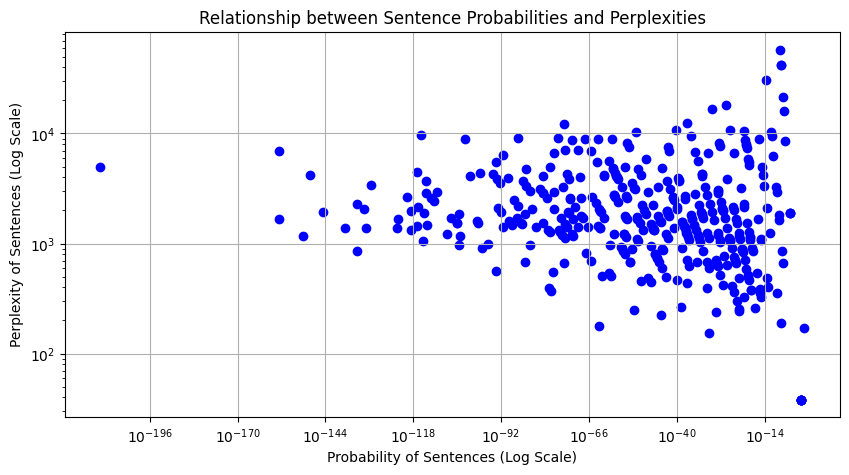

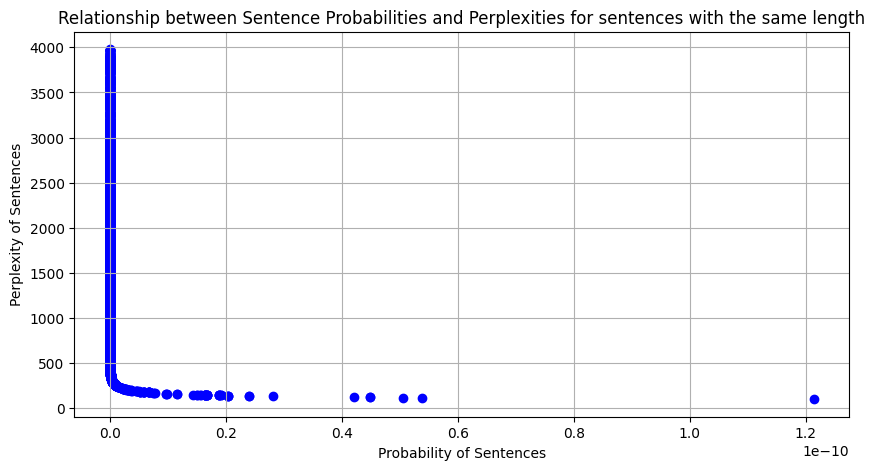

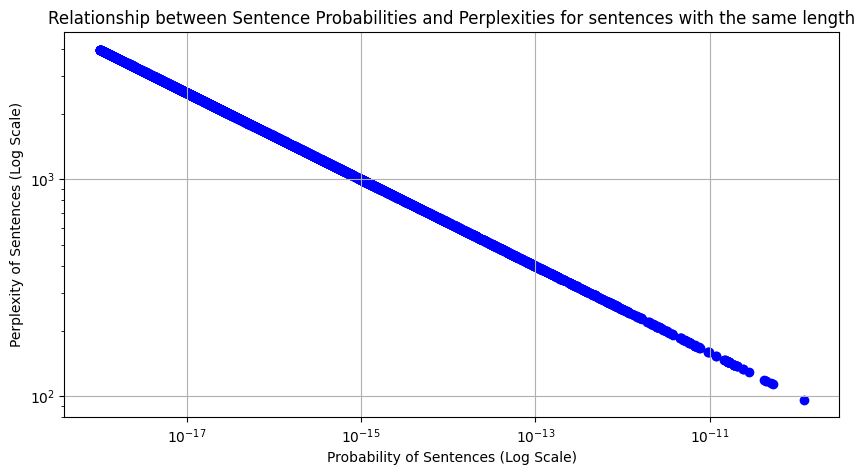

In [ ]:
sentences = Data1[0:1000]
probabilities = []
perplexities = []

for sent in sentences:
      sent = " ".join(sent[1:-1])
      sent = sent.lower()
      # bigram
      N = 2
      prob = sent_prob(sent.split(), lm, N)
      perplexity = compute_perplexity(sent.split(), lm, N)
      # if 1e-18 <= prob <= 1e-4:
      # if perplexity != float('inf'):
      probabilities.append(prob)
      perplexities.append(perplexity)


print(probabilities)
print(perplexities)
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(probabilities, perplexities, color='blue')
# used log scales
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Probability of Sentences (Log Scale)')
plt.ylabel('Perplexity of Sentences (Log Scale)')
plt.title('Relationship between Sentence Probabilities and Perplexities')
plt.grid(True)
plt.show()

sentences = Data1[0:-1]
probabilities = []
perplexities = []
for sent in sentences:

      sent = " ".join(sent[1:-1])
      sent = sent.lower()
      # bigram

      if len(sent.split()) == 5:
        N = 2
        prob = sent_prob(sent.split(), lm, N)
        perplexity = compute_perplexity(sent.split(), lm, N)
        if 1e-18 <= prob <= 1e-4:
          if perplexity != float('inf'):
            probabilities.append(prob)
            perplexities.append(perplexity)



import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(probabilities, perplexities, color='blue')
# used log scales
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Probability of Sentences')
plt.ylabel('Perplexity of Sentences')
plt.title('Relationship between Sentence Probabilities and Perplexities for sentences with the same length')
plt.grid(True)
plt.show()


sentences = Data1[0:-1]
probabilities = []
perplexities = []
for sent in sentences:

      sent = " ".join(sent[1:-1])
      sent = sent.lower()
      # bigram

      if len(sent.split()) == 5:
        N = 2
        prob = sent_prob(sent.split(), lm, N)
        perplexity = compute_perplexity(sent.split(), lm, N)
        if 1e-18 <= prob <= 1e-4:
          if perplexity != float('inf'):
            probabilities.append(prob)
            perplexities.append(perplexity)



import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(probabilities, perplexities, color='blue')
# used log scales
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Probability of Sentences (Log Scale)')
plt.ylabel('Perplexity of Sentences (Log Scale)')
plt.title('Relationship between Sentence Probabilities and Perplexities for sentences with the same length')
plt.grid(True)
plt.show()

█████ YOUR ANSWER HERE █████


In analyzing the probabilities and perplexities of sentences from the trained set, it is evident that there is a clear inverse relationship between the two metrics as expected. Generally, sentences with lower probabilities exhibit higher perplexities, which aligns with the theory that perplexity measures the model's surprise or uncertainty in predicting a sentence, with higher uncertainty reflected by lower probability estimates.  However,there are instances where sentences with identical probabilities yielded significantly different perplexities (graph 1), which is due to the difference in length of the sentence. As we can see from the graph 2,3 where the length of the sentences is the same, while the probabilities are closer to 0, the perplexities have significant increased
values. This is due to the fact that perplexity is the geometric mean of the probabilities.





# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook.

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge.

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will assign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to assign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best-performing N-gram smoothing methods, and up to a few years ago, a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state-of-the-art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurrences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization.

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vector $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transformation. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: [The Unreasonable Effectiveness of Mathematics in the Natural Sciences](http://www.dartmouth.edu/~matc/MathDrama/reading/Wigner.html))

# Acknowledgments

Most of this lab was developed in collaboration with Joost Bastings and Dan Douwe.  
Later it was revised by a couple of people.  
The recent updates by Lasha Abzianidze make the notebook more streamlined and foolproof from the grading and the large course perspectives.